# Telecom Customer Churn Prediction - Interactive Data Science Workbook

## Dataset Overview:
    
**Telecom Churn Prediction Dataset**
- **Description**: Contains customer information for a subscription-based service provider to predict customer churn (leaving the service).
- **Columns**: Includes customer details, services used, contract terms, and churn status.
- **Purpose**: Used for customer churn analysis, segmentation, and retention strategies.
- **Applications**: Churn prediction, customer satisfaction analysis, and targeted marketing.
- **Analysis Tasks**: EDA, data preprocessing, ML model building, evaluation, and model deployment.
- **Relevance**: A practical dataset for real-world data science and customer relationship management scenarios.

## Step 1: Importing Essential Libraries

**Foundational Concept**: In data science, we use specialized libraries for different tasks:
- **NumPy**: Numerical computations and array operations
- **Pandas**: Data manipulation and analysis
- **Matplotlib/Seaborn**: Data visualization
- **Scikit-learn**: Machine learning algorithms

In [ ]:
# Import the essential data science libraries
# We need numpy, pandas, seaborn, matplotlib, and warnings

import numpy as np           # For numerical operations and linear algebra
import pandas as pd          # For data processing and CSV file operations
import seaborn as sns        # For advanced statistical visualizations
import matplotlib.ticker as mtick  # For customizing axis tick formats
import matplotlib.pyplot as plt    # For basic plotting functionality
import warnings
warnings.filterwarnings("ignore")  # Suppress warning messages for cleaner output

# Set visualization style for better-looking plots
plt.style.use('seaborn-v0_8')  # Optional: Modern plotting style
sns.set_palette("husl")        # Optional: Color palette

## Step 2: Loading and Initial Data Inspection

**Key Concept**: Always start with understanding your data structure, size, and basic characteristics before any analysis.

In [ ]:
# Load the dataset using pandas
# Use pd.read_csv() function

telecom_cust = pd.read_csv(r"C:\Users\Asus\Downloads\churn_project_dev\data\Telecom_Customer_Churn.csv") # Load the dataset with the correct file path (absolute or relative)

# Display basic information about the dataset
print(f"Dataset shape: {telecom_cust.shape}")
print(f"Number of customers: {len(telecom_cust):,}")
print(f"Number of features: {telecom_cust.shape[1]}")

Dataset shape: (7043, 21)
Number of customers: 7,043
Number of features: 21


## Step 3: Data Preprocessing & Exploratory Data Analysis (EDA)

**Foundational Concept**: EDA is the process of analyzing and investigating datasets to discover patterns, spot anomalies, and check assumptions through statistical graphics and other data visualization methods.

### 3.1 Initial Data Inspection

In [ ]:
# Display first 5 rows to understand the data structure
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Get detailed information about the dataset
# This shows data types, non-null counts, and memory usage
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Generate descriptive statistics for numerical columns
# Shows count, mean, std, min, quartiles, and max values
telecom_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Display all column names for reference
print("Dataset Columns:")
print(telecom_cust.columns.values)
print(f"\nTotal columns: {len(telecom_cust.columns)}")

Dataset Columns:
['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']

Total columns: 21


### 3.2 Data Cleaning and Preprocessing

In [ ]:
# Convert TotalCharges to numerical data type
# Some values might be stored as strings, use pd.to_numeric() with errors='coerce'

# Converting Total Charges to a numerical data type
# 'coerce' will convert invalid parsing to NaN
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')

# Check the data type after conversion
print(f"TotalCharges data type: {telecom_cust.TotalCharges.dtype}")

TotalCharges data type: float64


In [ ]:
# Check for missing values in the dataset
# Use .isnull().sum() method

missing_values = telecom_cust.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])  # Only show columns with missing values

# Calculate percentage of missing values
missing_percent = (missing_values / len(telecom_cust)) * 100
print(f"\nPercentage of missing values: {missing_percent[missing_percent > 0]}")

Missing values per column:
TotalCharges    11
dtype: int64

Percentage of missing values: TotalCharges    0.156183
dtype: float64


In [ ]:
# Remove missing values (since they're minimal)
# In practice, you might want to impute values instead of dropping
print(f"Shape before removing missing values: {telecom_cust.shape}")
telecom_cust.dropna(inplace=True)
print(f"Shape after removing missing values: {telecom_cust.shape}")

Shape before removing missing values: (7043, 21)
Shape after removing missing values: (7032, 21)


In [ ]:
# Remove customer IDs from the dataset for modeling
# Customer ID is just an identifier and doesn't contribute to prediction
df2 = telecom_cust.iloc[:, 1:]  # Select all columns except the first one (customerID)
print(f"Shape after removing customerID: {df2.shape}")

Shape after removing customerID: (7032, 20)


In [ ]:
# Convert the target variable 'Churn' to binary numeric values
# Replace 'Yes' with 1 and 'No' with 0

# Converting the target variable to binary numeric format
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No', value=0, inplace=True)

# Verify the conversion
print("Churn value counts after conversion:")
print(df2['Churn'].value_counts())

Churn value counts after conversion:
Churn
0    5163
1    1869
Name: count, dtype: int64


### 3.3 Feature Engineering - Creating Dummy Variables

**Key Concept**: Machine learning algorithms work with numerical data. We need to convert categorical variables into numerical format using techniques like one-hot encoding (dummy variables).

In [ ]:
# Convert all categorical variables into dummy variables
# Use pd.get_dummies() function

# Create dummy variables for all categorical columns
df_dummies = pd.get_dummies(df2)
print(f"Shape after creating dummy variables: {df_dummies.shape}")
print(f"Number of features increased from {df2.shape[1]} to {df_dummies.shape[1]}")

# Display first few rows of the encoded dataset
df_dummies.head()

Shape after creating dummy variables: (7032, 46)
Number of features increased from 20 to 46


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


### 3.4 Correlation Analysis

**Key Concept**: Correlation analysis helps identify which features are most strongly related to our target variable (Churn).

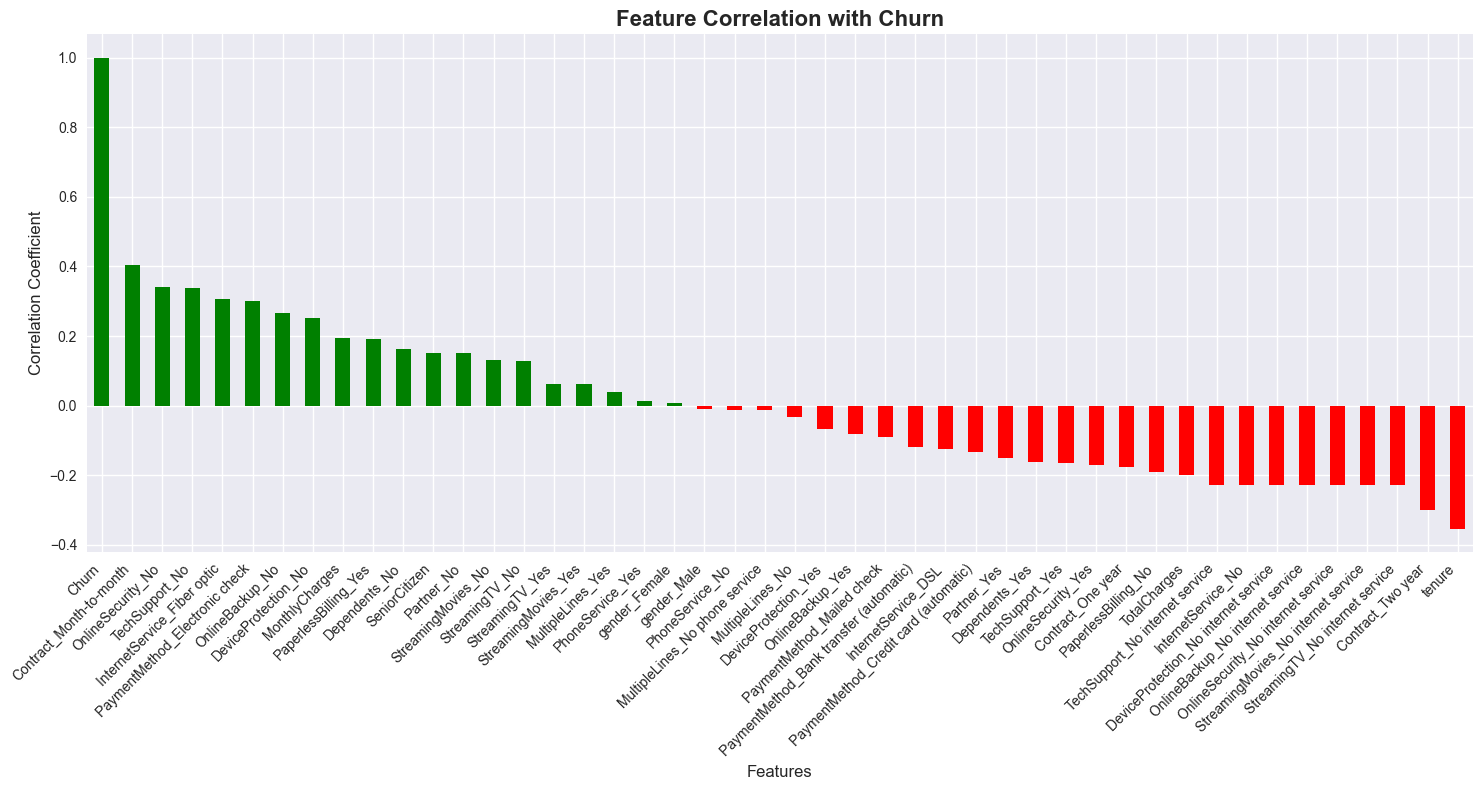

Top 5 positive correlations with Churn:
Contract_Month-to-month           0.404565
OnlineSecurity_No                 0.342235
TechSupport_No                    0.336877
InternetService_Fiber optic       0.307463
PaymentMethod_Electronic check    0.301455
Name: Churn, dtype: float64

Top 5 negative correlations with Churn:
OnlineSecurity_No internet service    -0.227578
StreamingMovies_No internet service   -0.227578
StreamingTV_No internet service       -0.227578
Contract_Two year                     -0.301552
tenure                                -0.354049
Name: Churn, dtype: float64


In [ ]:
# Create a correlation plot for the Churn variable
# Use df_dummies.corr()['Churn'] and sort the values

# Get correlation of "Churn" with other variables
plt.figure(figsize=(15, 8))
churn_correlation = df_dummies.corr()['Churn'].sort_values(ascending=False)
churn_correlation.plot(kind='bar', color=['red' if x < 0 else 'green' for x in churn_correlation])
plt.title('Feature Correlation with Churn', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print top positive and negative correlations
print("Top 5 positive correlations with Churn:")
print(churn_correlation.head(6)[1:])  # Exclude Churn itself
print("\nTop 5 negative correlations with Churn:")
print(churn_correlation.tail(5))

### Interpretation of Correlation Analysis

**Key Insights:**
- **Positive Correlations** (increase churn probability):
  - Month-to-month contracts
  - Absence of online security and tech support
  - Electronic check payment method
  - Fiber optic internet service

- **Negative Correlations** (decrease churn probability):
  - Longer tenure with the company
  - Two-year contracts
  - Services like online security, streaming TV, online backup

**Business Implication**: Services such as online security, streaming TV, online backup, tech support, etc., without internet connection seem to be negatively related to churn, suggesting these services increase customer loyalty.

## Step 4: Data Exploration & Visualization

**Objective**: Understand patterns and form hypotheses about customer behavior through detailed visualizations.

### 4.1 Demographic Analysis

**Focus Areas**: Gender, Age Range, Partner and Dependent status

#### 4.1.1 Gender Distribution

In [ ]:
# Create a gender distribution plot with percentages
# Use value_counts() and plot with percentage formatting

colors = ['brown', 'blue']
gender_counts = telecom_cust['gender'].value_counts()

# Create percentage plot
ax = (gender_counts * 100.0 / len(telecom_cust)).plot(
    kind='bar', stacked=True, rot=0, color=colors, figsize=(8, 6)
)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', fontsize=12)
ax.set_xlabel('Gender', fontsize=12)
ax.set_title('Gender Distribution in Customer Base', fontsize=14, fontweight='bold')

# Add percentage labels on bars
total = gender_counts.sum()
for bar, count in zip(ax.patches, gender_counts):
    percentage = count / total * 100
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 3.5,
            f'{percentage:.1f}%', fontsize=12, color='white', weight='bold', ha='center')

plt.tight_layout()
plt.show()

NameError: name 'telecom_cust' is not defined

**📈 Key Finding**: Customer base is almost evenly split between male and female customers (~50% each), indicating no gender bias in the customer acquisition.

#### 4.1.2 Senior Citizen Distribution

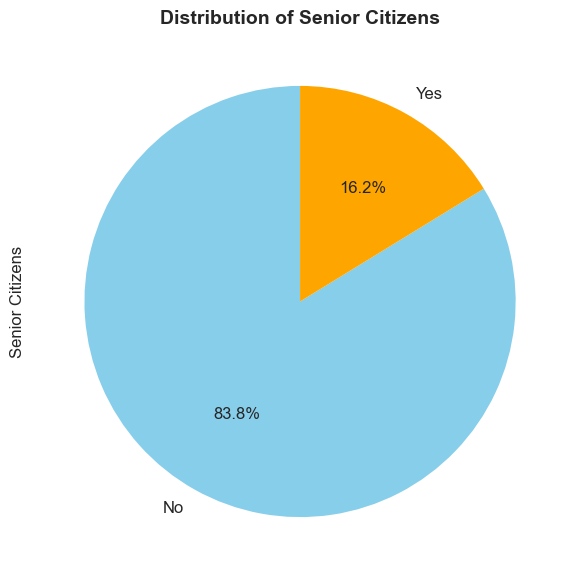

In [ ]:
# Create pie chart for senior citizen distribution
ax = (telecom_cust['SeniorCitizen'].value_counts() * 100.0 / len(telecom_cust)).plot.pie(
    autopct='%.1f%%', labels=['No', 'Yes'], figsize=(7, 7), fontsize=12,
    colors=['skyblue', 'orange'], startangle=90
)
ax.set_ylabel('Senior Citizens', fontsize=12)
ax.set_title('Distribution of Senior Citizens', fontsize=14, fontweight='bold')
plt.show()

**📈 Key Finding**: Only 16% of customers are senior citizens, indicating the customer base is primarily younger demographics.

#### 4.1.3 Partner and Dependent Status

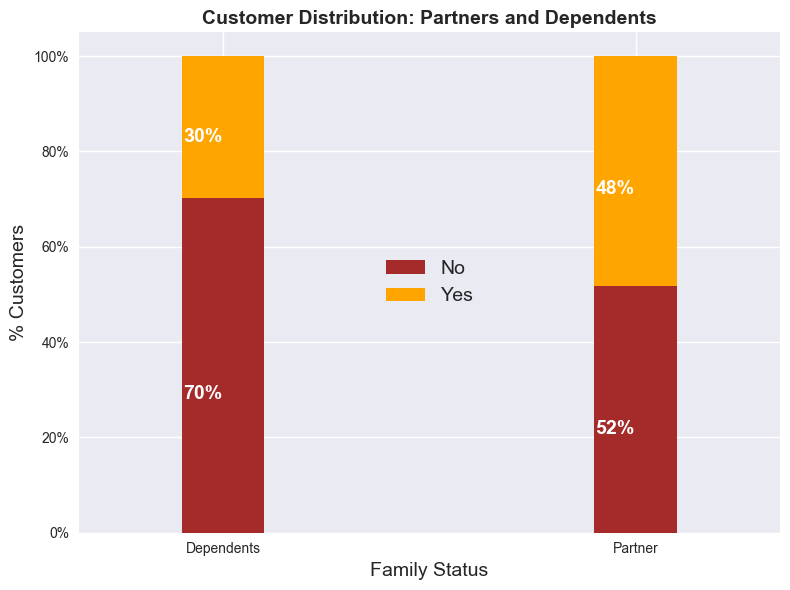

In [ ]:
# Create a grouped bar chart for Partner and Dependent status
# Use pd.melt() to reshape data and then group by variable and value

# Reshape data for better visualization
df_family = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents', 'Partner'])
df_family_grouped = df_family.groupby(['variable', 'value']).count().unstack()
df_family_percent = df_family_grouped * 100 / len(telecom_cust)

colors = ['brown', 'orange']
ax = df_family_percent.loc[:, 'customerID'].plot.bar(
    stacked=True, color=colors, figsize=(8, 6), rot=0, width=0.2
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Family Status', size=14)
ax.set_title('Customer Distribution: Partners and Dependents', size=14, fontweight='bold')
ax.legend(['No', 'Yes'], loc='center', prop={'size': 14})

# Add percentage labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    ax.annotate(f'{height:.0f}%',
                (p.get_x() + 0.25 * width, p.get_y() + 0.4 * height),
                color='white', weight='bold', size=14, ha='center')

plt.tight_layout()
plt.show()

**📈 Key Finding**: About 50% of customers have a partner, while only 30% have dependents. This suggests many customers are in relationships but haven't started families yet.

### 4.2 Customer Account Information Analysis

**Focus Areas**: Tenure patterns and contract type preferences

#### 4.2.1 Tenure Distribution

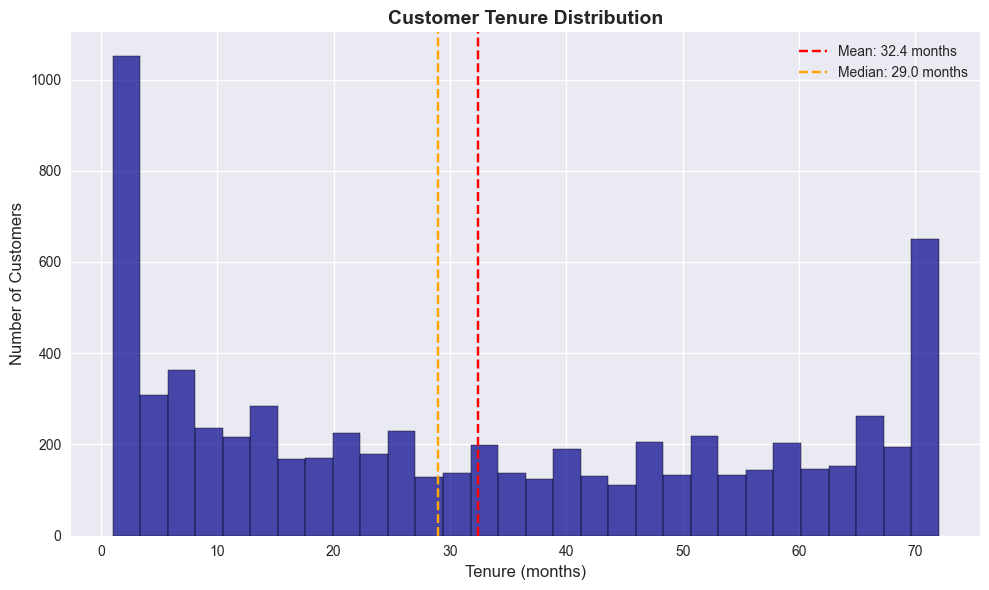

Tenure Statistics:
Mean tenure: 32.4 months
Median tenure: 29.0 months
Standard deviation: 24.5 months


In [ ]:
# Create a histogram of customer tenure
# Use sns.histplot() or plt.hist() to show tenure distribution

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=telecom_cust, x='tenure', bins=30, color='darkblue', alpha=0.7)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_xlabel('Tenure (months)', fontsize=12)
ax.set_title('Customer Tenure Distribution', fontsize=14, fontweight='bold')

# Add statistical information
mean_tenure = telecom_cust['tenure'].mean()
median_tenure = telecom_cust['tenure'].median()
plt.axvline(mean_tenure, color='red', linestyle='--', label=f'Mean: {mean_tenure:.1f} months')
plt.axvline(median_tenure, color='orange', linestyle='--', label=f'Median: {median_tenure:.1f} months')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Tenure Statistics:")
print(f"Mean tenure: {mean_tenure:.1f} months")
print(f"Median tenure: {median_tenure:.1f} months")
print(f"Standard deviation: {telecom_cust['tenure'].std():.1f} months")

#### 4.2.2 Contract Type Distribution

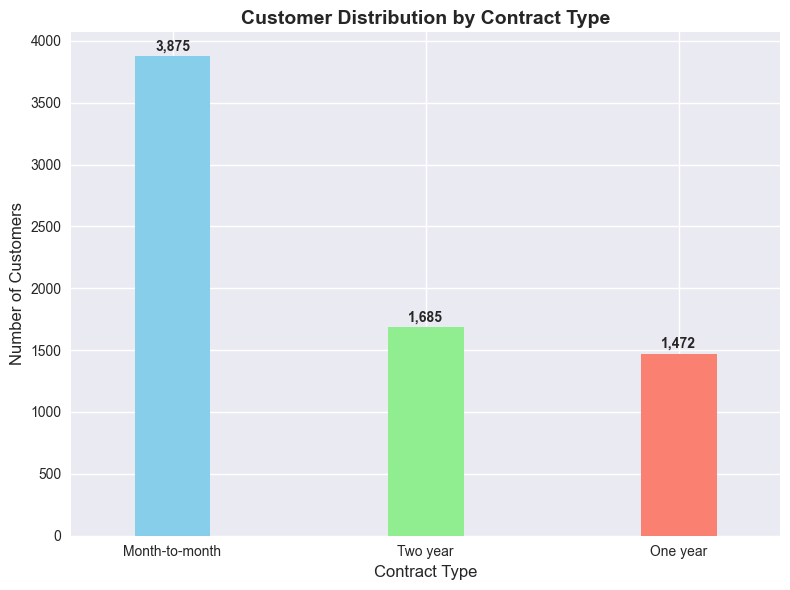

In [ ]:
# Contract type distribution
plt.figure(figsize=(8, 6))
ax = telecom_cust['Contract'].value_counts().plot(kind='bar', rot=0, width=0.3,
                                                  color=['skyblue', 'lightgreen', 'salmon'])
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_xlabel('Contract Type', fontsize=12)
ax.set_title('Customer Distribution by Contract Type', fontsize=14, fontweight='bold')

# Add count labels on bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 20,
            f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

**📈 Key Finding**: Most customers prefer month-to-month contracts, while one-year and two-year contracts have similar, smaller customer bases.

#### 4.2.3 Advanced Analysis: Tenure by Contract Type

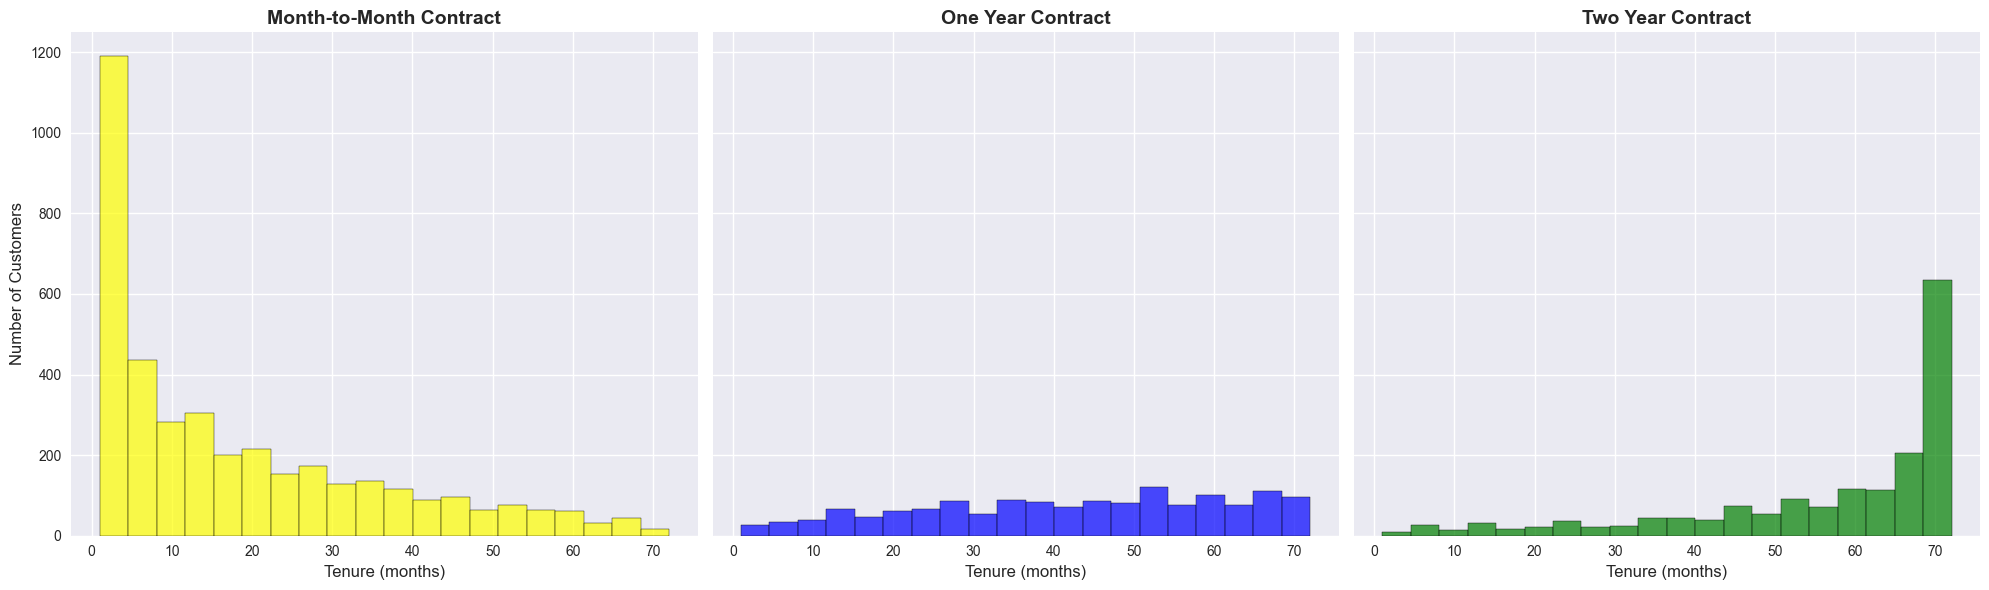

In [ ]:
# Advanced: Tenure distribution by contract type
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))

# Month-to-month contracts
sns.histplot(data=telecom_cust[telecom_cust['Contract'] == 'Month-to-month'],
             x='tenure', bins=20, color='yellow', alpha=0.7, ax=ax1)
ax1.set_ylabel('Number of Customers', fontsize=12)
ax1.set_xlabel('Tenure (months)', fontsize=12)
ax1.set_title('Month-to-Month Contract', fontsize=14, fontweight='bold')

# One year contracts
sns.histplot(data=telecom_cust[telecom_cust['Contract'] == 'One year'],
             x='tenure', bins=20, color='blue', alpha=0.7, ax=ax2)
ax2.set_xlabel('Tenure (months)', fontsize=12)
ax2.set_title('One Year Contract', fontsize=14, fontweight='bold')

# Two year contracts
sns.histplot(data=telecom_cust[telecom_cust['Contract'] == 'Two year'],
             x='tenure', bins=20, color='green', alpha=0.7, ax=ax3)
ax3.set_xlabel('Tenure (months)', fontsize=12)
ax3.set_title('Two Year Contract', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

**📈 Key Insight**: Monthly contracts typically last 1-2 months, while two-year contracts tend to last around 70 months. This demonstrates that customers with longer contracts show higher loyalty and stay with the company for extended periods.

### 4.3 Services Usage Analysis

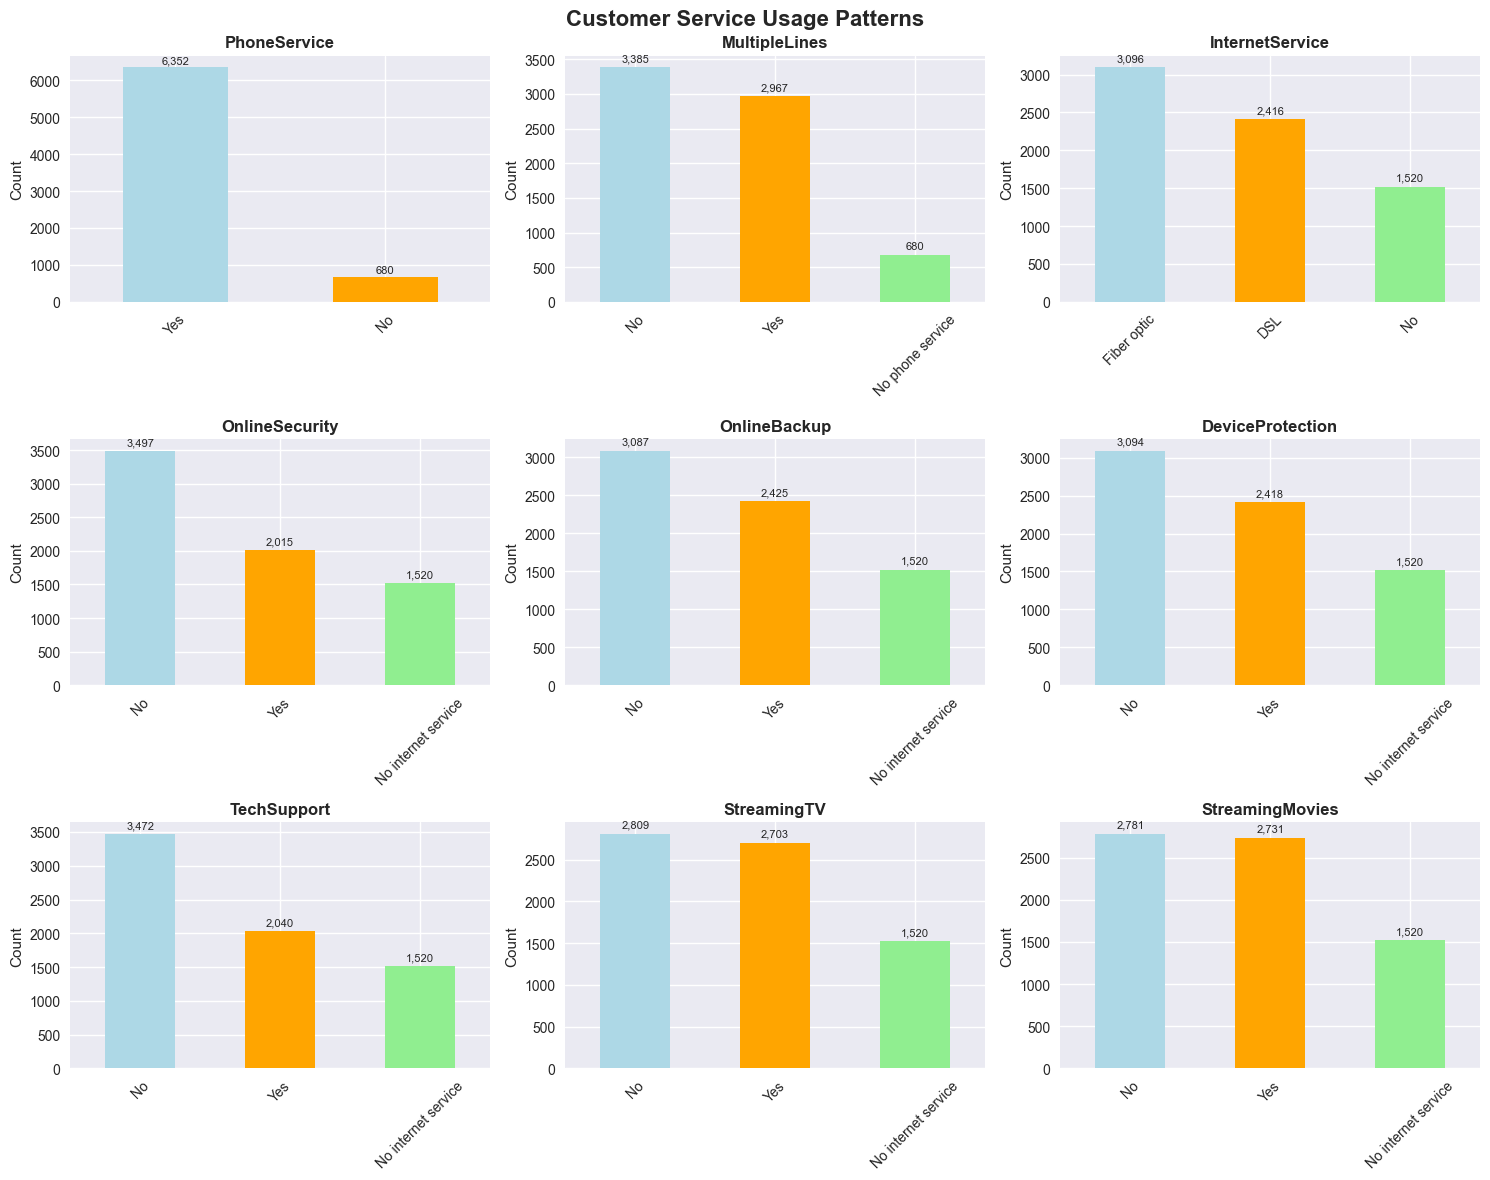

In [ ]:
# Create a comprehensive services usage visualization
# Create subplots for each service type

services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for i, service in enumerate(services):
    row, col = divmod(i, 3)

    # Get value counts and create bar plot
    service_counts = telecom_cust[service].value_counts()
    ax = service_counts.plot(kind='bar', ax=axes[row, col], rot=45,
                            color=['lightblue', 'orange', 'lightgreen'])
    ax.set_title(f'{service}', fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Count')

    # Add count labels on bars
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 50,
                f'{int(height):,}', ha='center', va='bottom', fontsize=8)

plt.suptitle('Customer Service Usage Patterns', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 4.4 Financial Analysis: Monthly vs Total Charges Relationship

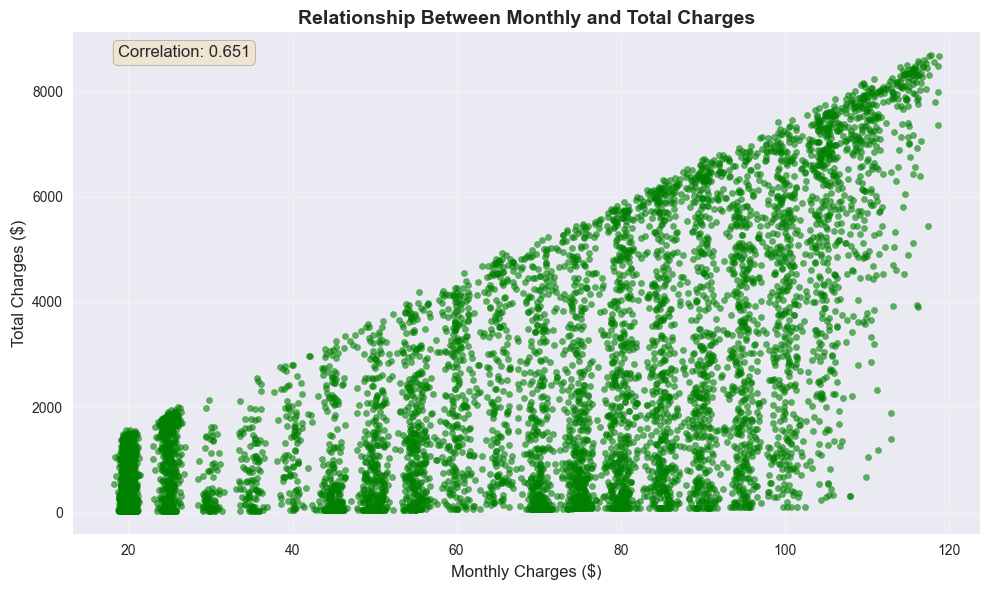

In [ ]:
# Create a scatter plot showing the relationship between monthly and total charges
# Use plt.scatter() or df.plot.scatter()

plt.figure(figsize=(10, 6))
plt.scatter(telecom_cust['MonthlyCharges'], telecom_cust['TotalCharges'],
           color='green', alpha=0.6, s=20)
plt.xlabel('Monthly Charges ($)', fontsize=12)
plt.ylabel('Total Charges ($)', fontsize=12)
plt.title('Relationship Between Monthly and Total Charges', fontsize=14, fontweight='bold')

# Add correlation coefficient
correlation = telecom_cust['MonthlyCharges'].corr(telecom_cust['TotalCharges'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}',
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**📈 Key Finding**: Strong positive correlation between monthly charges and total charges - as expected, customers with higher monthly bills tend to have higher total charges over time.

### 4.5 Churn Analysis - Target Variable Relationships

**Key Concept**: Understanding how different factors relate to customer churn is crucial for building effective retention strategies.

#### 4.5.1 Overall Churn Rate

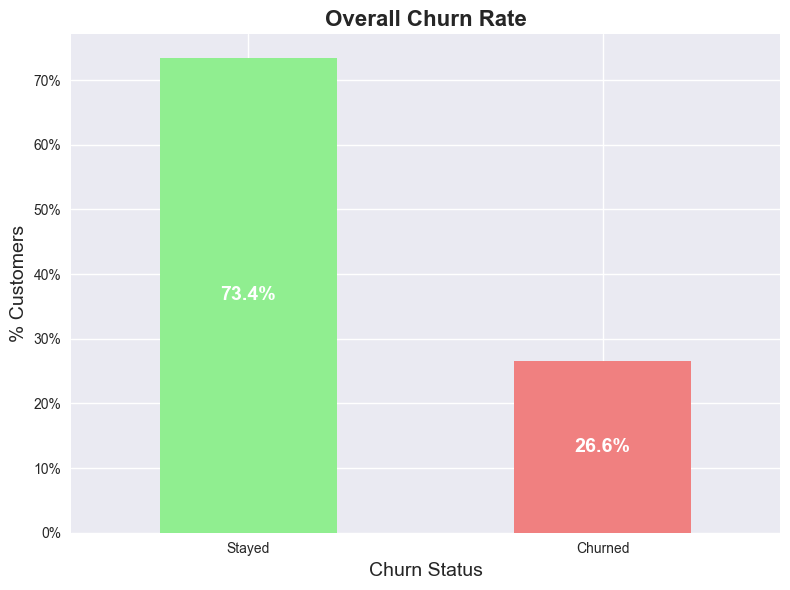

Churn Rate: 26.6%
Retention Rate: 73.4%


In [ ]:
# Create a churn rate visualization
# Calculate percentage of customers who churned vs stayed

colors = ['lightgreen', 'lightcoral']
churn_counts = telecom_cust['Churn'].value_counts()
churn_percentages = (churn_counts * 100.0 / len(telecom_cust))

plt.figure(figsize=(8, 6))
ax = churn_percentages.plot(kind='bar', stacked=True, rot=0, color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Churn Status', size=14)
ax.set_title('Overall Churn Rate', size=16, fontweight='bold')
ax.set_xticklabels(['Stayed', 'Churned'])

# Add percentage labels
for i, (bar, percentage) in enumerate(zip(ax.patches, churn_percentages)):
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height()/2.,
            f'{percentage:.1f}%', ha='center', va='center',
            fontsize=14, color='white', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Churn Rate: {churn_percentages['Yes']:.1f}%")
print(f"Retention Rate: {churn_percentages['No']:.1f}%")

#### 4.5.2 Churn vs Tenure Analysis

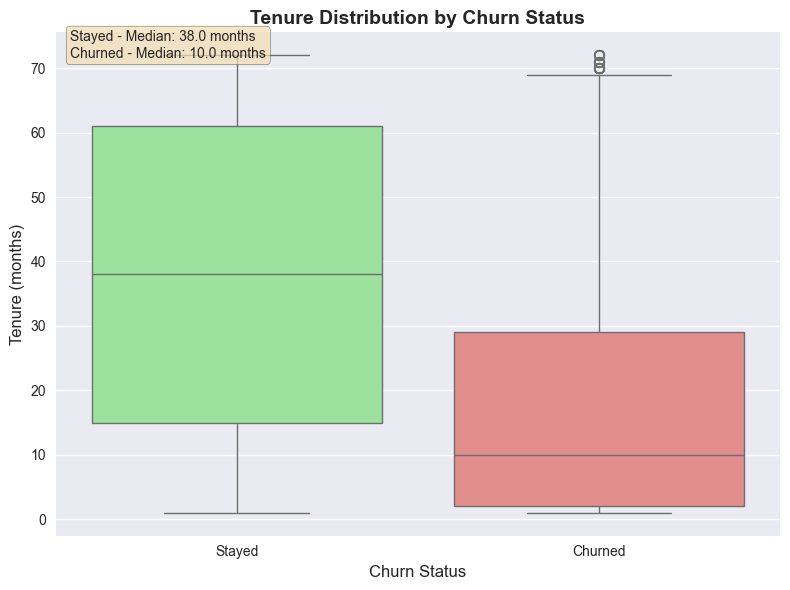

In [ ]:
# Create a box plot to show tenure distribution by churn status
# Use sns.boxplot() with x=Churn and y=tenure

plt.figure(figsize=(8, 6))
sns.boxplot(data=telecom_cust, x='Churn', y='tenure', palette=['lightgreen', 'lightcoral'])
plt.title('Tenure Distribution by Churn Status', fontsize=14, fontweight='bold')
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Tenure (months)', fontsize=12)
plt.xticks([0, 1], ['Stayed', 'Churned'])

# Add statistical annotations
stayed_tenure = telecom_cust[telecom_cust['Churn'] == 'No']['tenure']
churned_tenure = telecom_cust[telecom_cust['Churn'] == 'Yes']['tenure']

plt.text(0.02, 0.95,
         f'Stayed - Median: {stayed_tenure.median():.1f} months\nChurned - Median: {churned_tenure.median():.1f} months',
         transform=plt.gca().transAxes, fontsize=10,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

plt.tight_layout()
plt.show()

**📈 Key Finding**: Customers who don't churn tend to stay significantly longer with the company. This suggests tenure is a strong predictor of loyalty.

#### 4.5.3 Churn by Contract Type

<Figure size 1000x600 with 0 Axes>

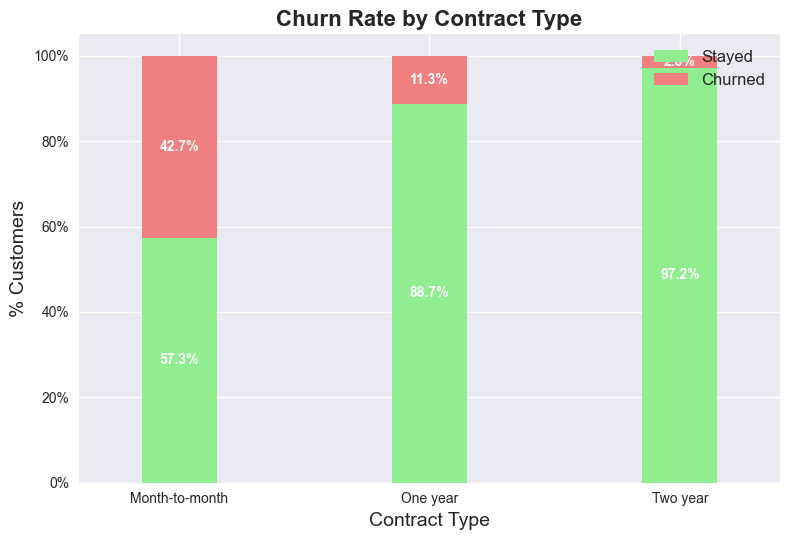

Churn rates by contract type:
Month-to-month: 42.7%
One year: 11.3%
Two year: 2.8%


In [ ]:
# Create a stacked bar chart showing churn rates by contract type
# Use groupby to calculate churn rates for each contract type

contract_churn = telecom_cust.groupby(['Contract', 'Churn']).size().unstack()
contract_churn_pct = (contract_churn.T * 100.0 / contract_churn.T.sum()).T

plt.figure(figsize=(10, 6))
ax = contract_churn_pct.plot(kind='bar', width=0.3, stacked=True, rot=0,
                            color=['lightgreen', 'lightcoral'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(['Stayed', 'Churned'], loc='upper right', prop={'size': 12})
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Contract Type', size=14)
ax.set_title('Churn Rate by Contract Type', size=16, fontweight='bold')

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center',
                color='white', fontweight='bold')

plt.tight_layout()
plt.show()

# Print actual churn rates
print("Churn rates by contract type:")
for contract in contract_churn.index:
    total = contract_churn.loc[contract].sum()
    churned = contract_churn.loc[contract, 'Yes']
    rate = (churned / total) * 100
    print(f"{contract}: {rate:.1f}%")

**📈 Critical Insight**: Month-to-month contract customers have an extremely high churn rate, highlighting the importance of encouraging longer-term commitments.

#### 4.5.4 Churn by Senior Citizen Status

<Figure size 800x600 with 0 Axes>

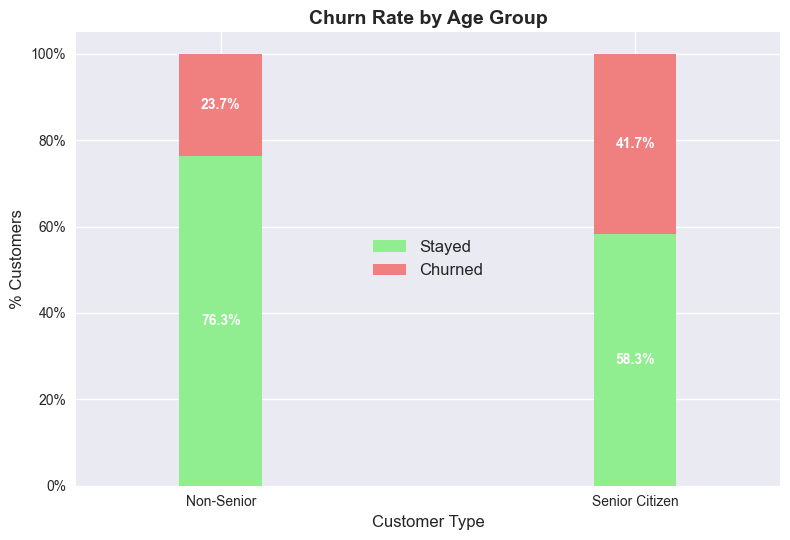

In [ ]:
# Senior citizen churn analysis
seniority_churn = telecom_cust.groupby(['SeniorCitizen', 'Churn']).size().unstack()
seniority_churn_pct = (seniority_churn.T * 100.0 / seniority_churn.T.sum()).T

plt.figure(figsize=(8, 6))
ax = seniority_churn_pct.plot(kind='bar', width=0.2, stacked=True, rot=0,
                             color=['lightgreen', 'lightcoral'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(['Stayed', 'Churned'], loc='center', prop={'size': 12})
ax.set_ylabel('% Customers', fontsize=12)
ax.set_xlabel('Customer Type', fontsize=12)
ax.set_title('Churn Rate by Age Group', size=14, fontweight='bold')
ax.set_xticklabels(['Non-Senior', 'Senior Citizen'])

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center',
                color='white', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

**📈 Key Finding**: Senior citizens have almost double the churn rate compared to younger customers, suggesting they may need different retention strategies.

#### 4.5.5 Churn by Monthly Charges Distribution

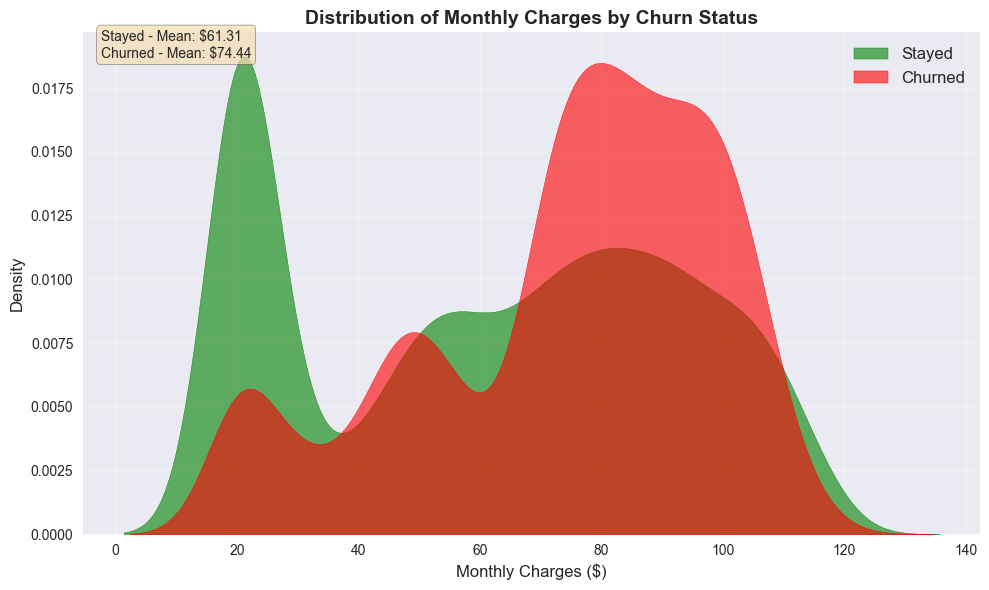

In [ ]:
# Create overlapping density plots for monthly charges by churn status
# Use sns.kdeplot() or sns.histplot() with different colors for each group

plt.figure(figsize=(10, 6))
sns.kdeplot(data=telecom_cust[telecom_cust["Churn"] == 'No'],
           x="MonthlyCharges", color="green", fill=True, alpha=0.6, label="Stayed")
sns.kdeplot(data=telecom_cust[telecom_cust["Churn"] == 'Yes'],
           x="MonthlyCharges", color="red", fill=True, alpha=0.6, label="Churned")

plt.xlabel('Monthly Charges ($)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of Monthly Charges by Churn Status', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add statistical information
stayed_charges = telecom_cust[telecom_cust["Churn"] == 'No']['MonthlyCharges']
churned_charges = telecom_cust[telecom_cust["Churn"] == 'Yes']['MonthlyCharges']

plt.text(0.02, 0.95,
         f'Stayed - Mean: ${stayed_charges.mean():.2f}\nChurned - Mean: ${churned_charges.mean():.2f}',
         transform=plt.gca().transAxes, fontsize=10,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

plt.tight_layout()
plt.show()

**📈 Key Finding**: Higher percentage of customers churn when monthly charges are high, indicating price sensitivity as a major churn factor.

#### 4.5.6 Churn by Total Charges Distribution

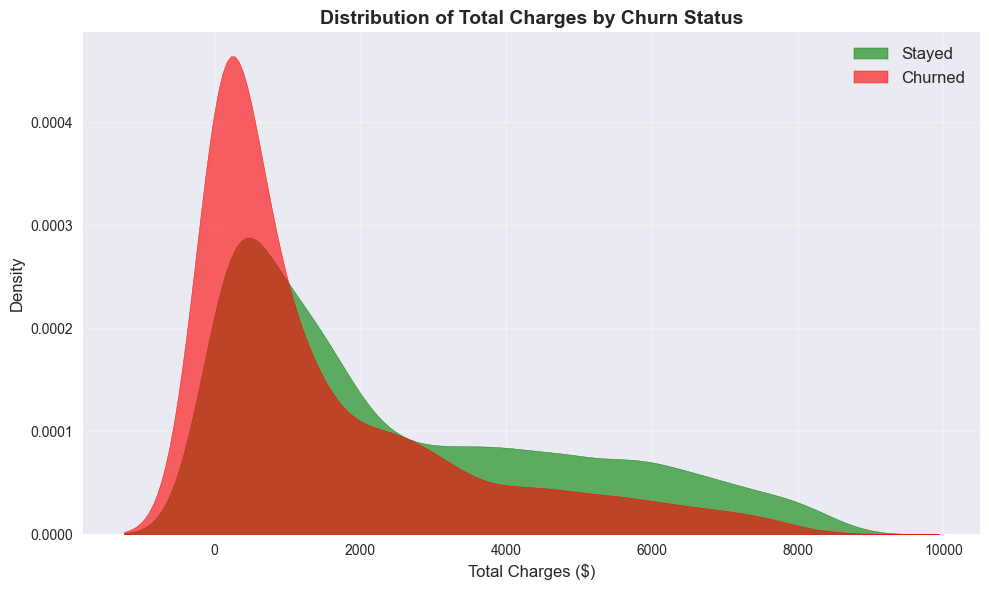

In [ ]:
# Total charges distribution by churn status
plt.figure(figsize=(10, 6))
sns.kdeplot(data=telecom_cust[telecom_cust["Churn"] == 'No'],
           x="TotalCharges", color="green", fill=True, alpha=0.6, label="Stayed")
sns.kdeplot(data=telecom_cust[telecom_cust["Churn"] == 'Yes'],
           x="TotalCharges", color="red", fill=True, alpha=0.6, label="Churned")

plt.xlabel('Total Charges ($)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of Total Charges by Churn Status', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**📈 Key Finding**: Higher churn occurs when total charges are lower, likely indicating that customers who leave early (short tenure) haven't accumulated high total charges.

## Step 5: Machine Learning Model Development & Comparison

**Learning Objective**: Build and compare multiple ML algorithms to predict customer churn, understanding their strengths and performance characteristics.

**Algorithms to Implement:**
- Logistic Regression (Linear baseline)
- Random Forest (Ensemble method)
- Support Vector Machine (SVM)
- AdaBoost (Boosting ensemble)
- XGBoost (Advanced boosting) - *Advanced/Optional*

### 5.1 Data Preparation for Machine Learning

**Key Concepts**:
- **Feature scaling**: Normalizing features to similar ranges for optimal algorithm performance
- **Train-test split**: Dividing data to train models and evaluate their performance on unseen data

In [ ]:
# Prepare the data for machine learning
# Separate features (X) and target (y), then scale the features

# Separate features and target variable
y = df_dummies['Churn'].values
X = df_dummies.drop(columns=['Churn'])

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution: {np.bincount(y)}")

# Feature scaling - normalize all variables to range 0-1
from sklearn.preprocessing import MinMaxScaler

feature_names = X.columns.values
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=feature_names)

print("\nFeature scaling completed!")
print(f"Feature ranges after scaling:")
print(f"Min values: {X.min().min():.3f}")
print(f"Max values: {X.max().max():.3f}")

Features shape: (7032, 45)
Target shape: (7032,)
Target distribution: [5163 1869]

Feature scaling completed!
Feature ranges after scaling:
Min values: 0.000
Max values: 1.000


In [ ]:
# Split the data into training and testing sets
# Use train_test_split with test_size=0.3 for 70-30 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=101,
                                                    stratify=y)  # Maintain class distribution

print(f"Training set size: {X_train.shape[0]:,} samples")
print(f"Test set size: {X_test.shape[0]:,} samples")
print(f"Training set churn rate: {y_train.mean():.3f}")
print(f"Test set churn rate: {y_test.mean():.3f}")

Training set size: 4,922 samples
Test set size: 2,110 samples
Training set churn rate: 0.266
Test set churn rate: 0.266


### 5.2 Model 1: Logistic Regression

**Key Concept**: Logistic Regression is a linear algorithm that's excellent for understanding feature relationships and providing baseline performance.

In [ ]:
# Train a logistic regression model
# Import LogisticRegression, create model instance, and fit to training data

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Create and train the model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


In [ ]:
# Make predictions and calculate accuracy
# Use model.predict() and metrics.accuracy_score()

lr_predictions = lr_model.predict(X_test)
lr_accuracy = metrics.accuracy_score(y_test, lr_predictions)

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")

# Additional metrics for comprehensive evaluation
from sklearn.metrics import classification_report, confusion_matrix

print("\nDetailed Classification Report:")
print(classification_report(y_test, lr_predictions, target_names=['Stayed', 'Churned']))

Logistic Regression Accuracy: 0.8081 (80.81%)

Detailed Classification Report:
              precision    recall  f1-score   support

      Stayed       0.84      0.91      0.87      1549
     Churned       0.67      0.54      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



#### 5.2.1 Feature Importance Analysis - Logistic Regression

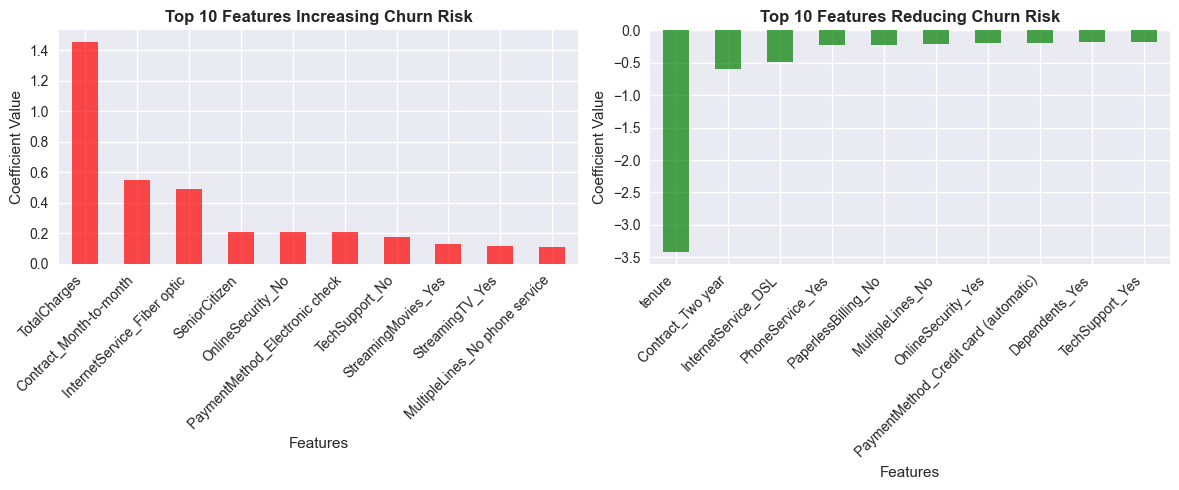

Features that INCREASE churn probability:
TotalCharges                      1.458
Contract_Month-to-month           0.551
InternetService_Fiber optic       0.491
SeniorCitizen                     0.207
OnlineSecurity_No                 0.204
PaymentMethod_Electronic check    0.204
TechSupport_No                    0.176
StreamingMovies_Yes               0.127
StreamingTV_Yes                   0.116
MultipleLines_No phone service    0.107
dtype: float64

Features that DECREASE churn probability:
tenure                                  -3.426
Contract_Two year                       -0.594
InternetService_DSL                     -0.487
PhoneService_Yes                        -0.228
PaperlessBilling_No                     -0.221
MultipleLines_No                        -0.209
OnlineSecurity_Yes                      -0.201
PaymentMethod_Credit card (automatic)   -0.188
Dependents_Yes                          -0.177
TechSupport_Yes                         -0.173
dtype: float64


In [ ]:
# Analyze feature weights (coefficients) from logistic regression
# Use model.coef_[0] to get coefficients and create a pandas Series

# Get feature weights (coefficients)
feature_weights = pd.Series(lr_model.coef_[0], index=X.columns.values)

# Plot top positive coefficients (increase churn probability)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
top_positive = feature_weights.sort_values(ascending=False)[:10]
top_positive.plot(kind='bar', color='red', alpha=0.7)
plt.title('Top 10 Features Increasing Churn Risk', fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')

# Plot top negative coefficients (decrease churn probability)
plt.subplot(1, 2, 2)
top_negative = feature_weights.sort_values(ascending=True)[:10]
top_negative.plot(kind='bar', color='green', alpha=0.7)
plt.title('Top 10 Features Reducing Churn Risk', fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("Features that INCREASE churn probability:")
print(top_positive.round(3))
print("\nFeatures that DECREASE churn probability:")
print(top_negative.round(3))

#### Logistic Regression Insights

**Key Business Insights:**
- **High Risk Factors**: Month-to-month contracts, fiber optic service, electronic check payments
- **Protective Factors**: Two-year contracts, DSL internet, longer tenure
- **Interpretation**: The model coefficients align with our EDA findings, validating our exploratory analysis

### 5.3 Model 2: Random Forest

**Key Concept**: Random Forest is an ensemble method that combines multiple decision trees, providing robust predictions and feature importance rankings.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,        # Number of trees
    random_state=50,         # For reproducibility
    max_depth=10,           # Prevent overfitting
    min_samples_split=50,    # Minimum samples to split
    n_jobs=-1               # Use all processors
)

rf_model.fit(X_train, y_train)
# Make predictions and calculate accuracy

rf_predictions = rf_model.predict(X_test)
rf_accuracy = metrics.accuracy_score(y_test, rf_predictions)

print(f"Random Forest Accuracy: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")
print(f"Improvement over Logistic Regression: {(rf_accuracy - lr_accuracy)*100:.2f} percentage points")

Random Forest Accuracy: 0.8076 (80.76%)
Improvement over Logistic Regression: -0.05 percentage points


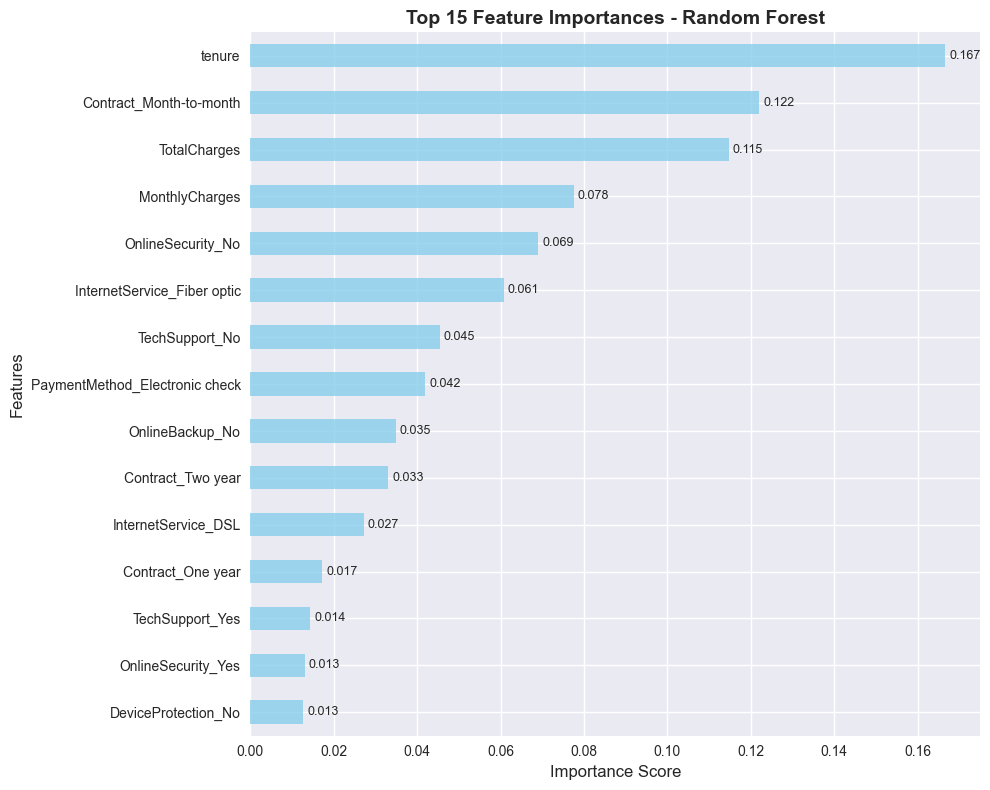

Top 10 Most Important Features:
tenure                            0.1666
Contract_Month-to-month           0.1219
TotalCharges                      0.1147
MonthlyCharges                    0.0775
OnlineSecurity_No                 0.0691
InternetService_Fiber optic       0.0607
TechSupport_No                    0.0454
PaymentMethod_Electronic check    0.0419
OnlineBackup_No                   0.0349
Contract_Two year                 0.0330
dtype: float64


In [ ]:
# Analyze feature importance from Random Forest
# Use model.feature_importances_ attribute

# Get feature importances
rf_importances = pd.Series(rf_model.feature_importances_, index=X.columns.values)

# Plot top 15 most important features
plt.figure(figsize=(10, 8))
top_features = rf_importances.sort_values(ascending=False)[:15]
top_features.sort_values().plot(kind='barh', color='skyblue', alpha=0.8)
plt.title('Top 15 Feature Importances - Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Add importance scores as text
for i, v in enumerate(top_features.sort_values()):
    plt.text(v + 0.001, i, f'{v:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("Top 10 Most Important Features:")
print(rf_importances.sort_values(ascending=False)[:10].round(4))

#### Random Forest Insights

**Key Findings:**
- **Most Important Predictors**: Monthly charges, tenure, and total charges
- **Contract Importance**: Monthly contract terms appear as strong predictors
- **Consistency**: Results align closely with logistic regression, validating our feature importance hierarchy

### 5.4 Model 3: Support Vector Machine (SVM)

**Key Concept**: SVM finds optimal decision boundaries by maximizing margins between classes, often achieving high accuracy on well-structured datasets.

In [ ]:
# Create fresh train-test split for SVM (different random state for comparison)
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    X, y, test_size=0.2, random_state=99, stratify=y
)

In [ ]:
# Train an SVM model
# Import SVC and use linear kernel for interpretability

from sklearn.svm import SVC

# Create and train SVM model
svm_model = SVC(kernel='linear', random_state=42, C=1.0)
svm_model.fit(X_train_svm, y_train_svm)

# Make predictions and calculate accuracy
svm_predictions = svm_model.predict(X_test_svm)
svm_accuracy = metrics.accuracy_score(y_test_svm, svm_predictions)

print(f"SVM Accuracy: {svm_accuracy:.4f} ({svm_accuracy*100:.2f}%)")

SVM Accuracy: 0.7974 (79.74%)


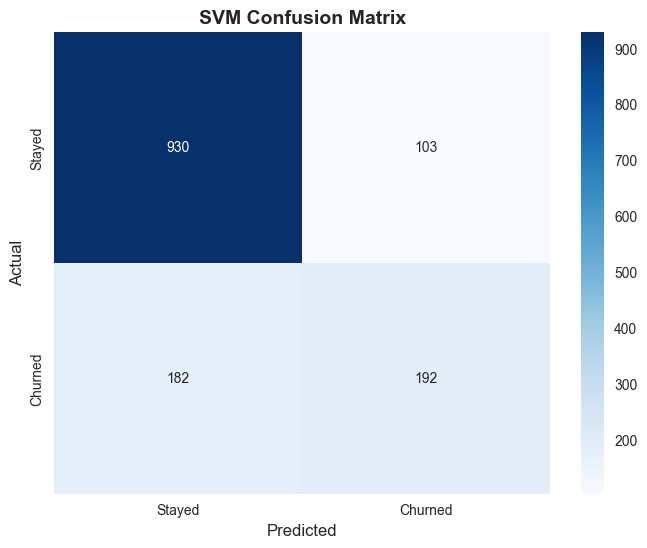


SVM Performance Metrics:
Accuracy:  0.7974
Precision: 0.6508
Recall:    0.5134
F1-Score:  0.5740


In [ ]:
# Create and analyze confusion matrix
# Use confusion_matrix and visualize with seaborn heatmap

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test_svm, svm_predictions)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Stayed', 'Churned'],
           yticklabels=['Stayed', 'Churned'])
plt.title('SVM Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# Calculate additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test_svm, svm_predictions)
recall = recall_score(y_test_svm, svm_predictions)
f1 = f1_score(y_test_svm, svm_predictions)

print(f"\nSVM Performance Metrics:")
print(f"Accuracy:  {svm_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

#### SVM Performance Analysis
**Achievement**: SVM demonstrates strong performance with linear kernel, suggesting the data has good linear separability characteristics.

### 5.5 Model 4: AdaBoost

**Key Concept**: AdaBoost (Adaptive Boosting) sequentially builds weak learners, with each subsequent learner focusing on previously misclassified examples.

In [ ]:
# Train an AdaBoost model
# Import AdaBoostClassifier and use default parameters

from sklearn.ensemble import AdaBoostClassifier

# Create and train AdaBoost model
ada_model = AdaBoostClassifier(
    n_estimators=100,        # Number of weak learners
    learning_rate=1.0,       # Controls contribution of each classifier
    random_state=42
)

ada_model.fit(X_train_svm, y_train_svm)

# Make predictions and calculate accuracy
ada_predictions = ada_model.predict(X_test_svm)
ada_accuracy = metrics.accuracy_score(y_test_svm, ada_predictions)

print(f"AdaBoost Accuracy: {ada_accuracy:.4f} ({ada_accuracy*100:.2f}%)")

# Compare with previous models
print(f"\nModel Comparison:")
print(f"Logistic Regression: {lr_accuracy:.4f}")
print(f"Random Forest:       {rf_accuracy:.4f}")
print(f"SVM:                 {svm_accuracy:.4f}")
print(f"AdaBoost:            {ada_accuracy:.4f}")

AdaBoost Accuracy: 0.7868 (78.68%)

Model Comparison:
Logistic Regression: 0.8081
Random Forest:       0.8076
SVM:                 0.7974
AdaBoost:            0.7868


### 5.6 Model 5: XGBoost (Advanced/Optional)

**⚠️ Advanced Content**: XGBoost is a sophisticated gradient boosting framework. This section is optional for intermediate learners but valuable for understanding state-of-the-art ensemble methods.

XGBoost Accuracy: 0.7868 (78.68%)


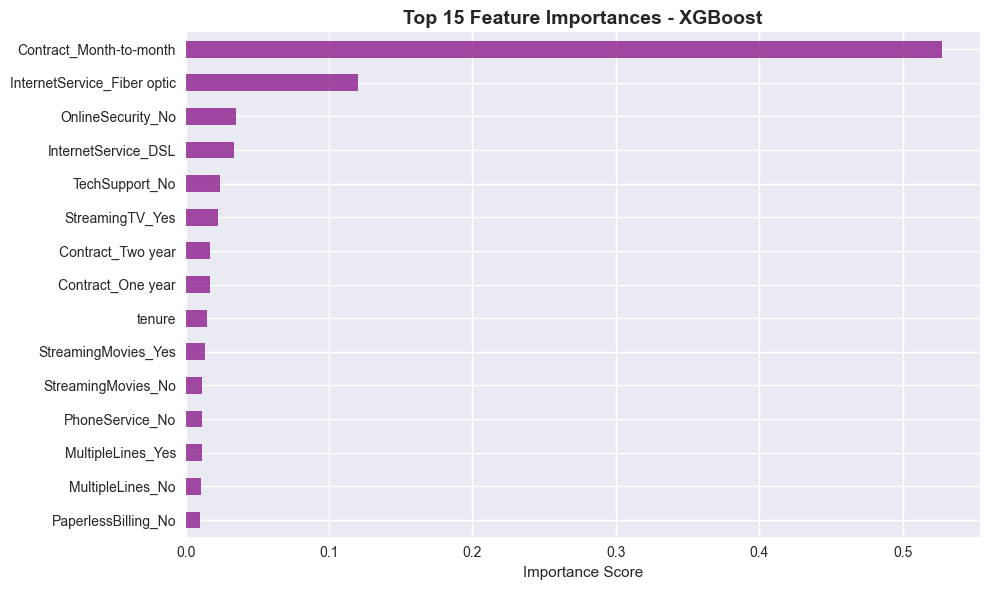

In [ ]:
try:
    from xgboost import XGBClassifier

    # Create and train XGBoost model
    xgb_model = XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        eval_metric='logloss'  # Suppress warning
    )

    xgb_model.fit(X_train_svm, y_train_svm)

    # Make predictions
    xgb_predictions = xgb_model.predict(X_test_svm)
    xgb_accuracy = metrics.accuracy_score(y_test_svm, xgb_predictions)

    print(f"XGBoost Accuracy: {xgb_accuracy:.4f} ({xgb_accuracy*100:.2f}%)")

    # Feature importance from XGBoost
    xgb_importances = pd.Series(xgb_model.feature_importances_, index=X.columns.values)

    plt.figure(figsize=(10, 6))
    xgb_importances.sort_values(ascending=False)[:15].sort_values().plot(kind='barh',
                                                                         color='purple', alpha=0.7)
    plt.title('Top 15 Feature Importances - XGBoost', fontsize=14, fontweight='bold')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

except ImportError:
    print("XGBoost not installed. Skipping this advanced model.")
    print("To install: pip install xgboost")
    xgb_accuracy = None

#### XGBoost Insights (Advanced)
**Performance**: XGBoost often achieves high accuracy through gradient boosting, though it requires careful parameter tuning and has longer training times.

## Step 6: Comprehensive Model Comparison & Business Insights

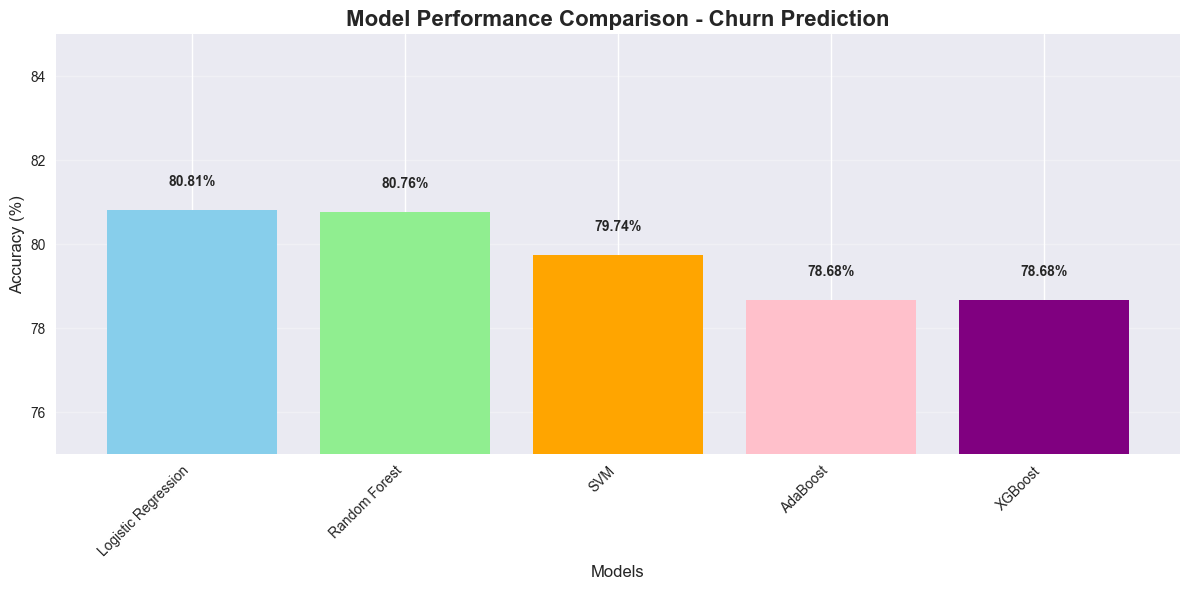

📊 FINAL MODEL COMPARISON RESULTS
              Model  Accuracy  Accuracy_Percent
Logistic Regression    0.8081         80.805687
      Random Forest    0.8076         80.758294
                SVM    0.7974         79.744136
           AdaBoost    0.7868         78.678038
            XGBoost    0.7868         78.678038

🏆 BEST PERFORMING MODEL: Logistic Regression
   Accuracy: 0.8081 (80.81%)


In [ ]:
# Create a comprehensive model comparison visualization
# Create a DataFrame with model names and accuracies, then plot

# Compile model results
model_results = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'AdaBoost'],
    'Accuracy': [lr_accuracy, rf_accuracy, svm_accuracy, ada_accuracy]
}

# Add XGBoost if available
if 'xgb_accuracy' in locals() and xgb_accuracy is not None:
    model_results['Model'].append('XGBoost')
    model_results['Accuracy'].append(xgb_accuracy)

results_df = pd.DataFrame(model_results)
results_df['Accuracy_Percent'] = results_df['Accuracy'] * 100

# Create comparison visualization
plt.figure(figsize=(12, 6))
bars = plt.bar(results_df['Model'], results_df['Accuracy_Percent'],
               color=['skyblue', 'lightgreen', 'orange', 'pink', 'purple'][:len(results_df)])

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.title('Model Performance Comparison - Churn Prediction', fontsize=16, fontweight='bold')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(75, 85)  # Focus on the relevant range
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Display results table
print("📊 FINAL MODEL COMPARISON RESULTS")
print("=" * 50)
results_display = results_df.copy()
results_display['Accuracy'] = results_display['Accuracy'].round(4)
results_display = results_display.sort_values('Accuracy', ascending=False)
print(results_display.to_string(index=False))

# Identify best model
best_model = results_display.iloc[0]
print(f"\n🏆 BEST PERFORMING MODEL: {best_model['Model']}")
print(f"   Accuracy: {best_model['Accuracy']:.4f} ({best_model['Accuracy_Percent']:.2f}%)")

## Step 7: Business Insights & Actionable Recommendations

### Key Business Insights from Analysis

#### High-Risk Customer Segments:
1. **Month-to-Month Contract Customers** - Highest churn risk
2. **Senior Citizens** - Double the churn rate of younger customers
3. **High Monthly Charges** - Price sensitivity drives churn
4. **Fiber Optic Users** - Paradoxically higher churn despite premium service
5. **Electronic Check Payment Users** - Higher churn than other payment methods

#### Protective Factors (Retention Drivers):
1. **Long-Term Contracts** - Two-year contracts show lowest churn
2. **Higher Tenure** - Established customers are more loyal
3. **Bundled Services** - Multiple services increase stickiness
4. **Automatic Payment Methods** - Reduce payment friction

### Actionable Business Recommendations

#### Immediate Actions (0-3 months):
1. **Target Month-to-Month Customers**: Offer incentives to upgrade to annual contracts
2. **Senior Citizen Program**: Develop specialized retention programs for seniors
3. **Price Optimization**: Review pricing strategy for high-monthly-charge customers
4. **Payment Method Migration**: Incentivize electronic check users to switch to automatic payments

#### Medium-Term Strategies (3-12 months):
1. **Early Warning System**: Deploy predictive models to identify at-risk customers
2. **Service Bundle Optimization**: Encourage adoption of multiple services
3. **Customer Success Programs**: Proactive engagement for new customers
4. **Fiber Optic Experience Enhancement**: Investigate and address fiber service satisfaction issues

#### Long-Term Initiatives (12+ months):
1. **Loyalty Programs**: Reward long-tenure customers with exclusive benefits
2. **Personalized Pricing**: Dynamic pricing based on churn risk scores
3. **Product Development**: Develop sticky features that increase switching costs
4. **Market Research**: Deep dive into competitor analysis and customer satisfaction drivers